Data Assesment

1 a. 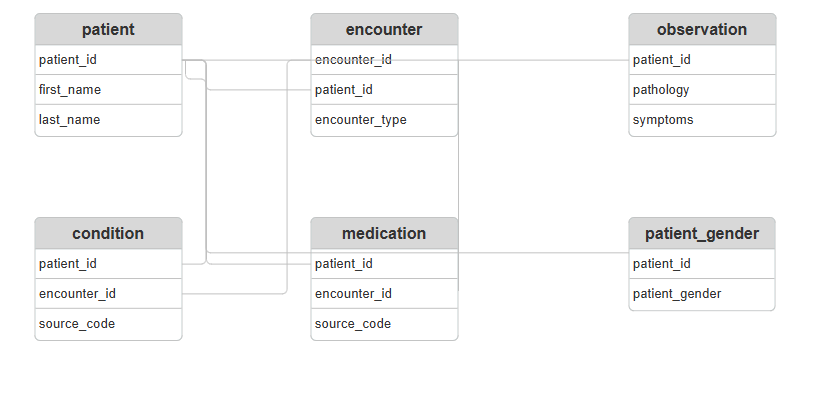

b. Data Quality Issues
    i. Patients
    1. First and last names have numbers at the end of them
2. FIPS has a decimal .0 at the end, should be numeric or varchar
3. Some income values are negative
ii. Encounters
1. Patient Id has letters in UUID upper case
iii. Conditions
1. Descriptions have a mix of lower and upper case.
2. Start is date, everything else is datetime. (Not necessarily wrong, just need to be aware of before comparing or filtering.)
iv. Medications
1. Descriptions are also mixed case
2. Inconsistent use of _ in column names
3. Encounter Ids also have upper case.
v. Symptoms
1. Symptoms column needs to be split
2. Symptoms column also has :number after each symptom


3. Great Expectations is a great data quality testing suite for checking that the data meets schema and quality expectations. You can define your expectations in the project the data assets are being created, and then run those expectations each time the asset is run via the orchestrator (like dagster) materializes the asset. This ensures that each time there are updates, those updates are not causing any data quality issues.

Data Analysis

a

In [1]:
import duckdb
con = duckdb.connect('dbt_project/example.duckdb')

In [2]:
con.sql("SELECT COUNT(DISTINCT patient_id) AS 'distinct patients in dataset' FROM dbt_schema.master_table").show()

┌──────────────────────────────┐
│ distinct patients in dataset │
│            int64             │
├──────────────────────────────┤
│                        10000 │
└──────────────────────────────┘



b.

In [3]:
part_b = con.sql("SELECT date_trunc('day', prescribing_date) as 'day', COUNT(DISTINCT source_code) as 'destinct_medication' FROM dbt_schema.master_table GROUP BY day").df()

In [4]:
con.sql("SELECT * FROM dbt_schema.master_table WHERE date_trunc('day', prescribing_date) = '2018-01-24';").show()

┌──────────────────────────────────────┬────────────┬───────────┬─────────┬────────────┬────────────┬────────────┬────────────────────────┬──────────────────────┬─────────────────┬─────────┬──────────┬───────────────────┬────────────────────┬─────────────────────┬───────────────┬──────────────┬─────────────────┬─────────────────┬─────────────────┬─────────┬─────────┬─────────────┬────────────────┬─────────────┬─────────────────────────┬───────────┬─────────────────────┬─────────────────────┬────────┬────────────────┬──────────────────────────────────────┬────────────────┬──────────────────────┬──────────────────────┬──────────────────────────────────────┬──────────────────────────────────────┬────────────────────────┬───────────────────────────────┬──────────────────────────────────────┬─────────────────────┬───────────────┬────────────────┬───────────────────┬──────────────────────────┬─────────────────────┬──────────────┬───────────────────────────────────────────┬───────┬───────────

<Axes: xlabel='day'>

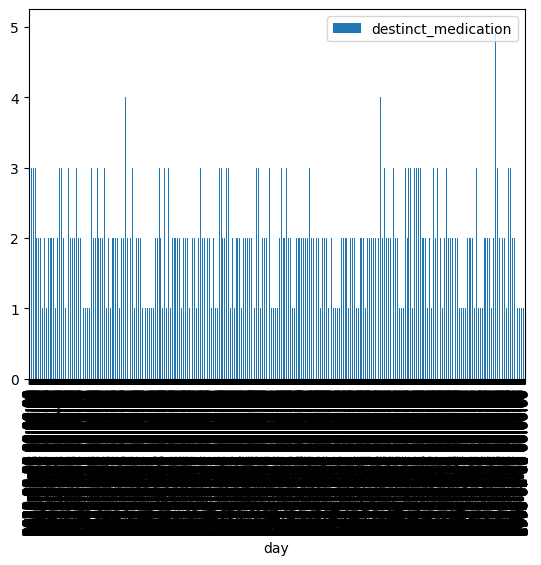

In [5]:
part_b.plot(x='day', y='destinct_medication', kind='bar')

c.

In [6]:
part_c = con.sql("SELECT race,  COUNT(DISTINCT patient_id) as cnt FROM dbt_schema.master_table GROUP BY race").df()

<Axes: ylabel='cnt'>

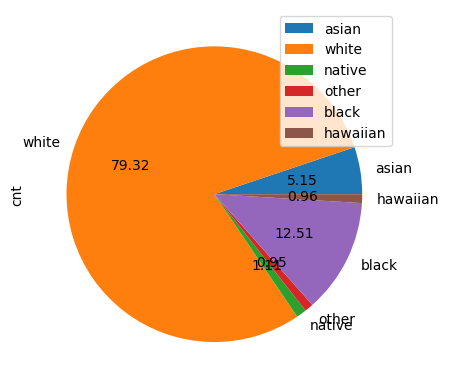

In [7]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) 
part_c.plot.pie(y='cnt', labels=part_c['race'], autopct=autopct)

In [8]:
part_c_2 = con.sql("SELECT patient_gender,  COUNT(DISTINCT patient_id) as cnt FROM dbt_schema.master_table GROUP BY patient_gender").df()

<Axes: ylabel='cnt'>

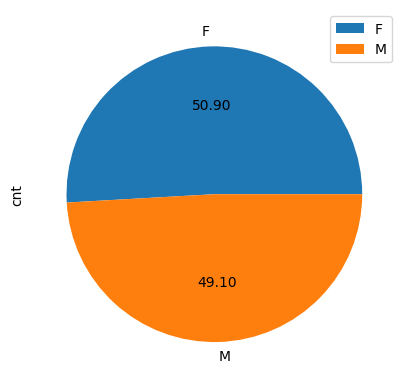

In [9]:
part_c_2.plot.pie(y='cnt', labels=part_c_2['patient_gender'], autopct=autopct)

d.

In [10]:
con.sql("SELECT COUNT(DISTINCT patient_id) FROM dbt_schema.master_table WHERE rash >=30 and joint_pain >= 30 and fever >= 30 and fatigue >=30").show()

┌────────────────────────────┐
│ count(DISTINCT patient_id) │
│           int64            │
├────────────────────────────┤
│                          0 │
└────────────────────────────┘



There are 0% because 0 of the patients have a fever >= 30.

In [14]:
con.sql("SELECT DISTINCT patient_id FROM dbt_schema.master_table WHERE fever>=30").show()

┌────────────┐
│ patient_id │
│  varchar   │
├────────────┤
│   0 rows   │
└────────────┘

